In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

#Reset graph, useful on notebooks
ops.reset_default_graph()

In [4]:
# Create graph
sess = tf.Session()

In [5]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [9]:
# Declare batch size
batch_size = 25

In [10]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [11]:
# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [12]:
# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

In [13]:
# Declare loss function (L2 loss)
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [15]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [16]:
# Next objective is to find best value of A & b for which model is optimum
# This is achieved using GradientDescent
# 0.05 is learning rate
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

In [17]:
# Training model
loss_vec = []
for i in range(100):
    #Pick random 25 numbers from the range of all ( x_vals)
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #25 A = [[ 1.92774904]] b = [[ 3.2249105]]
Loss = 0.81315
Step #50 A = [[ 1.56302536]] b = [[ 3.85605931]]
Loss = 0.332963
Step #75 A = [[ 1.27194071]] b = [[ 4.23854256]]
Loss = 0.236156
Step #100 A = [[ 1.09791279]] b = [[ 4.42252636]]
Loss = 0.291608


In [21]:
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

In [22]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

In [23]:
slope

array([ 1.09791279], dtype=float32)

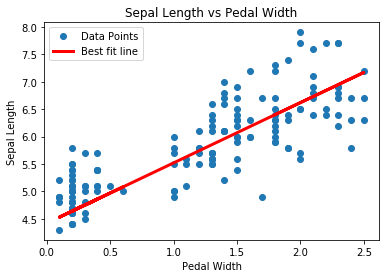

In [24]:
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()


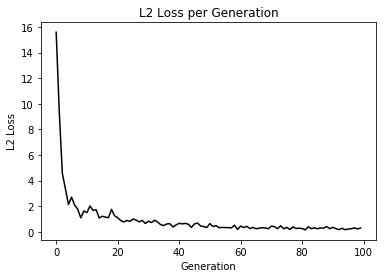

In [25]:
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

In [30]:
boston = datasets.load_boston()

In [36]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [37]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')